In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

C:\Users\vikra\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'coral'

* The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

* It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

* The columns in this dataset are:

    sepal length cm
    sepal width cm
    petal length cm
    petal width cm
    
* target:
    
    * Species('setosa','versicolor','virginica

* 3 flowers of Iris species.[https://en.wikipedia.org/wiki/Iris_flower_data_set]


In [3]:
iris = load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**`Count`** : It gives the how many values in each feature.with help of count we easily find which columns has missing value.\
**`mean`** : In this mean or central tendancy of each feature.\
**`std`** : std stands for standard deviation of columns.It shows how spread data from the mean.\
**`min`** : Minimum value of feature.\
**`25%`** : 25 percentile of columns.\
**`50%`** : 50 percentile of columns.\
**`75%`** : 75 percentile of columns.\
**`max`** : Maximum value of feature.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [8]:
data.shape

(150, 5)

In [9]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

we have 150 labeled sample of iris flower and 50 sample sample of every species.

# Univariate Analysis

In [10]:
iris_setosa = data.loc[data['species']=='setosa']
iris_virginica = data.loc[data['species']=='virginica']
iris_versicolor = data.loc[data['species']=='versicolor']


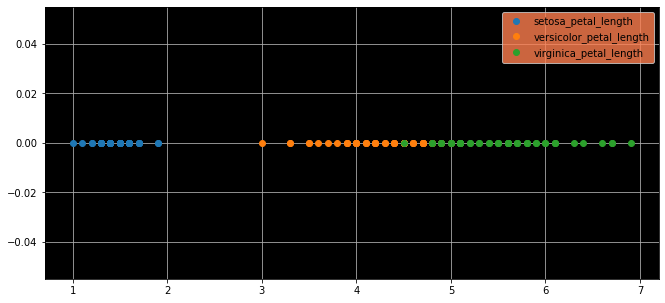

In [11]:
plt.figure(figsize = (11,5))
plt.plot(iris_setosa['petal length (cm)'],np.zeros_like(iris_setosa['petal length (cm)']),'o',label = 'setosa_petal_length')
plt.plot(iris_versicolor['petal length (cm)'],np.zeros_like(iris_versicolor['petal length (cm)']),'o',label = 'versicolor_petal_length')
plt.plot(iris_virginica['petal length (cm)'],np.zeros_like(iris_virginica['petal length (cm)']),'o',label = 'virginica_petal_length')
plt.grid()
plt.legend()
plt.show()

* There is 1-D plot of petal length of each species.
* we can see that the blue one is setosa flower well seperated from versicolor and virginica.
* but here we can't see that all points in 1-D graph.
* versicolor and virginica species are mixed up together.

In [12]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 792x360 with 0 Axes>

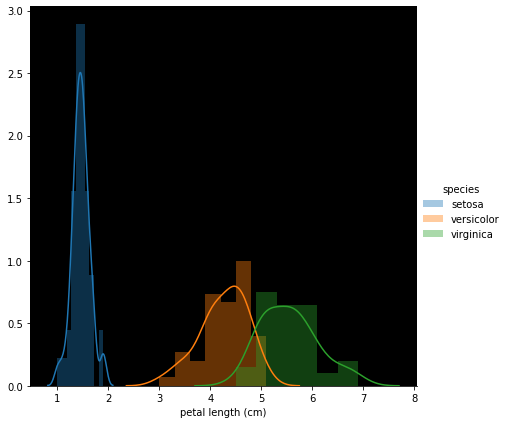

In [13]:
plt.figure(figsize = (11,5))
sns.FacetGrid(data,hue = 'species',size = 6).map(sns.distplot,'petal length (cm)').add_legend()
plt.show()

* setosa is well separated from versicolor and virginica. so we can easily find setosa flower by linear model or if else condition.
* in range 1.4 to 1.6 have most value in setosa.
* versicolor and virginica have some overlap and when we going to predict then we face some wrong prediction cause of overlap.we cannot find by if-else condition. if we going through if else condition then we assume 4.8 is a seperator point who seperate versicolor and virginica

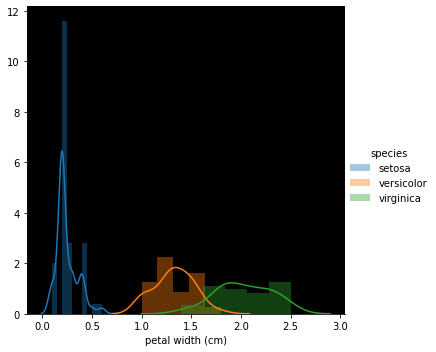

In [14]:
sns.FacetGrid(data,hue = 'species',size = 5).map(sns.distplot,'petal width (cm)').add_legend()
plt.show()

* here we can see petal width of setosa is not well separated like petal length, slightly overlap with versicolor. 
* petal width of versicolor and virginica have more spreadness than petal width.

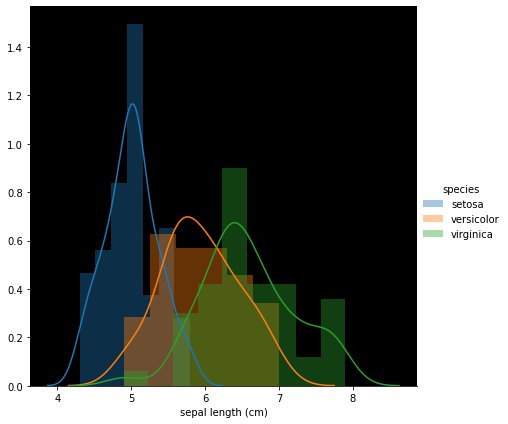

In [15]:
sns.FacetGrid(data,hue = 'species',size = 6).map(sns.distplot,'sepal length (cm)').add_legend()
plt.show()

* In this plot every species overlap together.so we can't prediction y if-else condition.
* In sepal length evrey species have more spreadness than other.

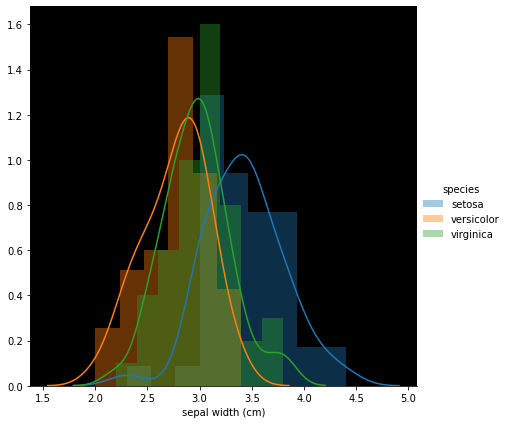

In [16]:
sns.FacetGrid(data,hue = 'species',size = 6).map(sns.distplot,'sepal width (cm)').add_legend()
plt.show()

* This plot totally overlap with each other so we can't easily predict by this feature.

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


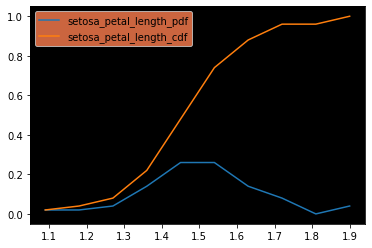

In [17]:
counts,bin_edges = np.histogram(iris_setosa['petal length (cm)'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label = 'setosa_petal_length_pdf')
plt.plot(bin_edges[1:],cdf,label = 'setosa_petal_length_cdf')
plt.legend()
plt.show()

* In this we plotted cdf and pdf of setosa petal length.
* Here we can see that most of the value lies between 1.3 to 1.7.we can easily analysis by probability density function.
* this pdf looks like bell shaped curve.

In [18]:
plt.rcParams['axes.labelsize'] = 15


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


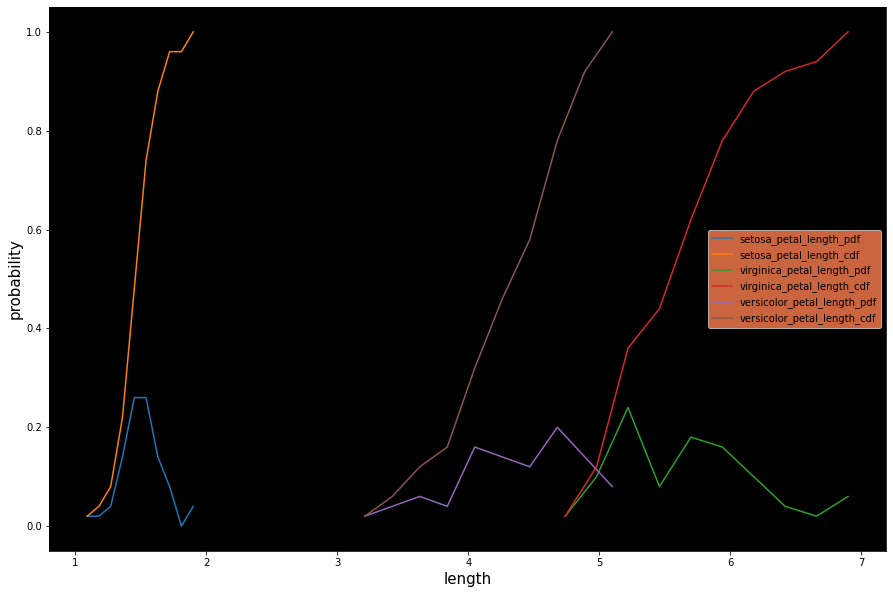

In [19]:
counts, bin_edges = np.histogram(iris_setosa['petal length (cm)'], bins=10,density = True) 

plt.figure(figsize = (15,10))                                
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'setosa_petal_length_pdf')
plt.plot(bin_edges[1:], cdf,label = 'setosa_petal_length_cdf')


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal length (cm)'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'virginica_petal_length_pdf')
plt.plot(bin_edges[1:], cdf,label = 'virginica_petal_length_cdf')


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal length (cm)'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'versicolor_petal_length_pdf')
plt.plot(bin_edges[1:], cdf,label = 'versicolor_petal_length_cdf')
plt.xlabel('length')
plt.ylabel('probability')
plt.legend()
plt.show();

* by cummulative density function,  we can see spreadness of setosa petal length of minmum than other petal length.

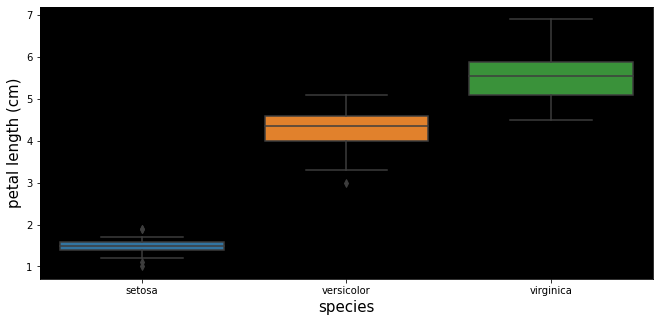

In [20]:
plt.figure(figsize = (11,5))
sns.boxplot(x = 'species',y = 'petal length (cm)',data = data)
plt.show()

* boxplot provide better visualisation than above plots.
* Here we can see that setosa width is smaller than other species it means that setosa has minimum spread comparison to versicolor and virginica.

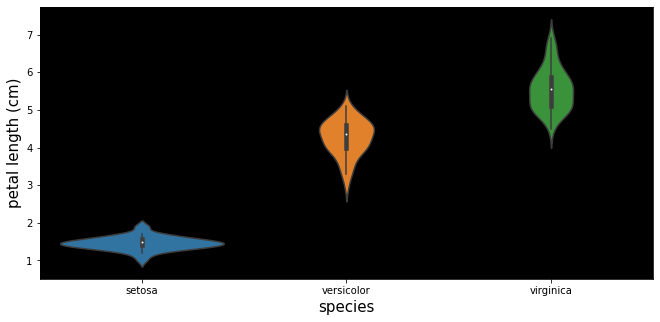

In [21]:
plt.figure(figsize = (11,5))
sns.violinplot(x = 'species',y = 'petal length (cm)',data = data,size = 8)
plt.show()

* Violin plot is best way to visulize data. It is just advanced version of boxplot.Here we can see the bell shape curve of pdf

# Bivariate Analysis

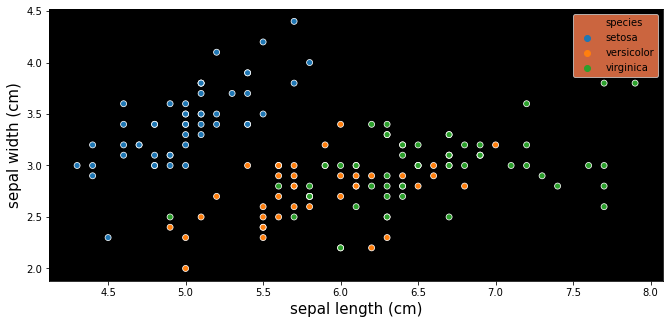

In [22]:
plt.figure(figsize = (11,5))
sns.scatterplot('sepal length (cm)','sepal width (cm)',hue = 'species',data = data)
plt.show()

* 2-D plot between sepal length and sepal width.
* we can see that setosa is well separated from virginica and versicolor.
* versicolor and virginica overlap together.so it is difficult to predict which flower versicolor or virginica.

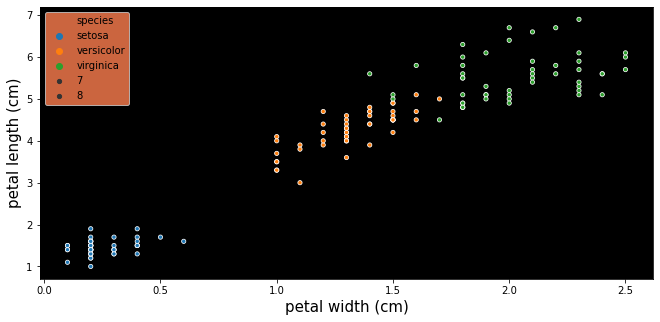

In [23]:
plt.figure(figsize = (11,5))
sns.scatterplot('petal width (cm)','petal length (cm)',data = data,hue = 'species',size = 8)
plt.show()

#### 2-D density plot

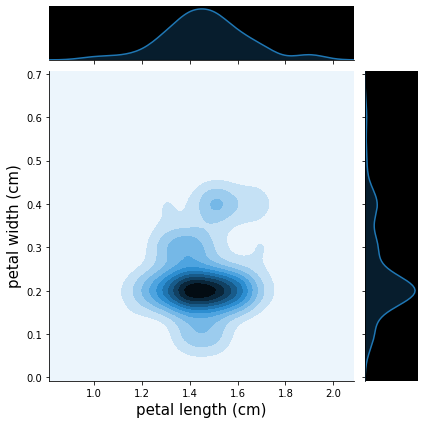

In [24]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)", data=iris_setosa, kind="kde");
plt.show()

* In this plot darkness of center shows that most of data point lies here.
* light color shows that minimum amount of datapoint lies.

* here is nice distribution of data between petal length and petal width.

# Multivariate Analysis 

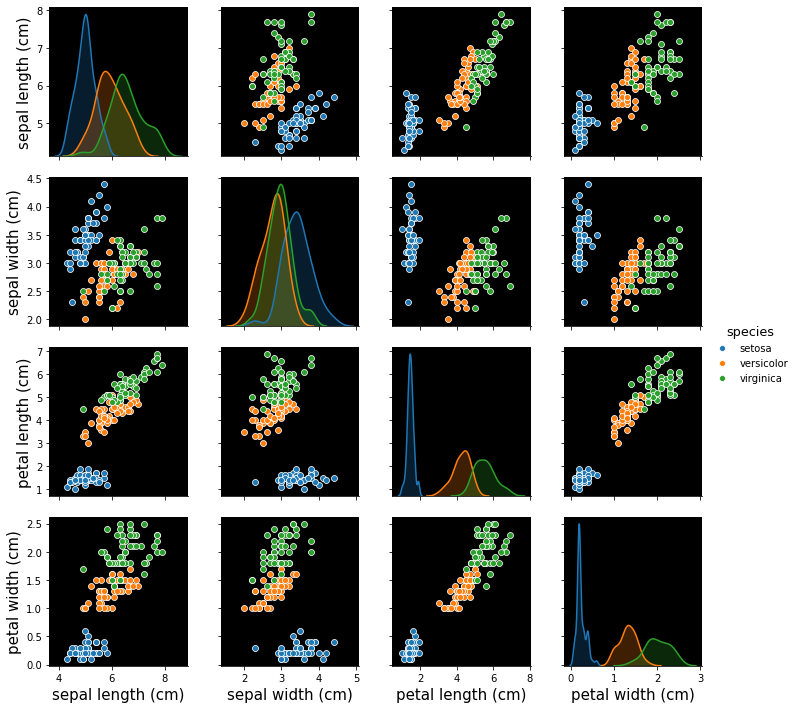

In [25]:

# sns.set_style("whitegrid");
sns.pairplot(data, hue="species")
plt.show()

* petal_length and petal_width are the most useful features to identify various flower types.
* While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
* We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# End the NoteBook!!!